In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('./datasets/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
df.loc[:121,"Region"]=0

In [6]:
df.loc[123:,"Region"]=1

In [7]:
df.drop(122,inplace=True)

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df.loc[0:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [10]:
df.drop(122,inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
df.shape

(244, 15)

In [12]:
df[df.Region==0].shape

(122, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
df.columns=df.columns.str.strip()

In [16]:
df[df.Classes.isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [17]:
mode=df.Classes.mode()[0].strip()

In [18]:
import numpy as np

In [19]:
df.Classes=df.Classes.replace(np.NaN,mode)

In [20]:
df.loc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes           fire
Region             1.0
Name: 165, dtype: object

In [21]:
df.Classes=df.Classes.str.strip()

In [22]:
df.Classes

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Length: 244, dtype: object

In [23]:
df.Classes=df.Classes.map({'fire':1,'not fire':0})

In [24]:
df.Classes.unique()

array([0, 1], dtype=int64)

In [25]:
df.Classes

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(1), int64(1), object(13)
memory usage: 28.7+ KB


In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [28]:
len(df.Rain.unique())

39

In [29]:
df.FFMC.nunique()

173

In [30]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(1), int32(6), int64(1), object(7)
memory usage: 23.0+ KB


In [32]:
objects=[feature for feature in df.columns if df[feature].dtype =='O']

In [33]:
df[df['DC']=='14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,1,1.0


In [34]:
df['DC']=df['DC'].replace('14.6 9',14.69)

In [35]:
objects=[feature for feature in df.columns if df[feature].dtype =='O']

In [40]:
for e in objects:
    print(e)
    df[e]=df[e].astype(float)

Rain
FFMC
DMC
DC
ISI
BUI
FWI


In [37]:
df.FWI=df.FWI.replace('fire   ',np.NaN)

In [38]:
df.FWI.astype(float).mean()

7.0353909465020585

In [41]:
df.FWI=df.FWI.replace(np.NaN,7.03)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(8), int32(6), int64(1)
memory usage: 23.0 KB


In [43]:
df.to_csv('./datasets/algerian_cleaned_data.csv',index=False)

In [44]:
df_cp=df.copy()

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

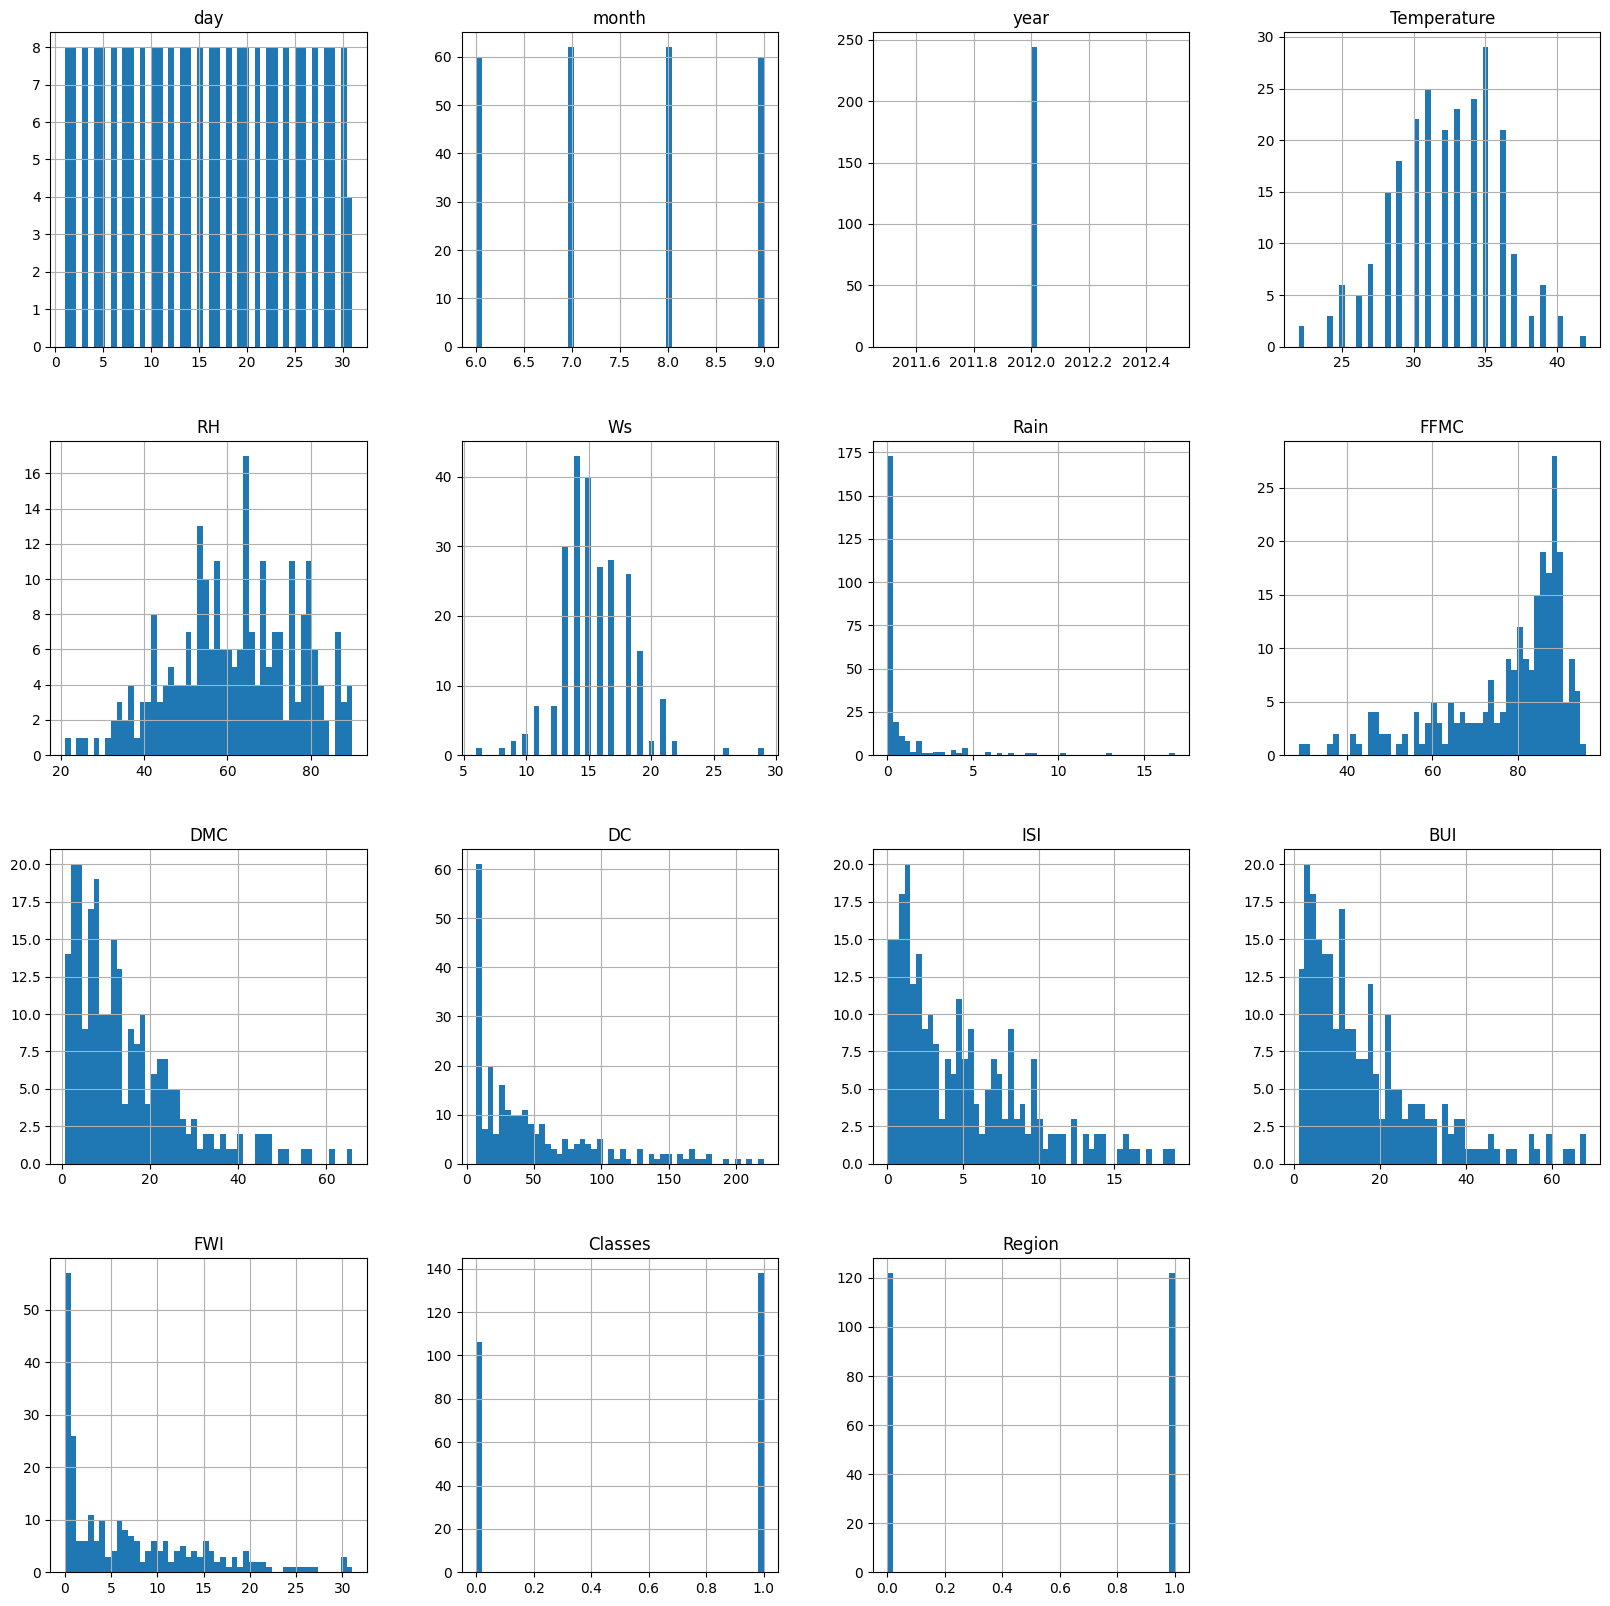

In [45]:
plt.figure()
df.hist(bins=50,figsize=(20,20),)

In [46]:
percantage=df.Classes.value_counts(normalize=True)*100

In [47]:
percantage

Classes
1    56.557377
0    43.442623
Name: proportion, dtype: float64

In [48]:
labels=['fire','not fire']

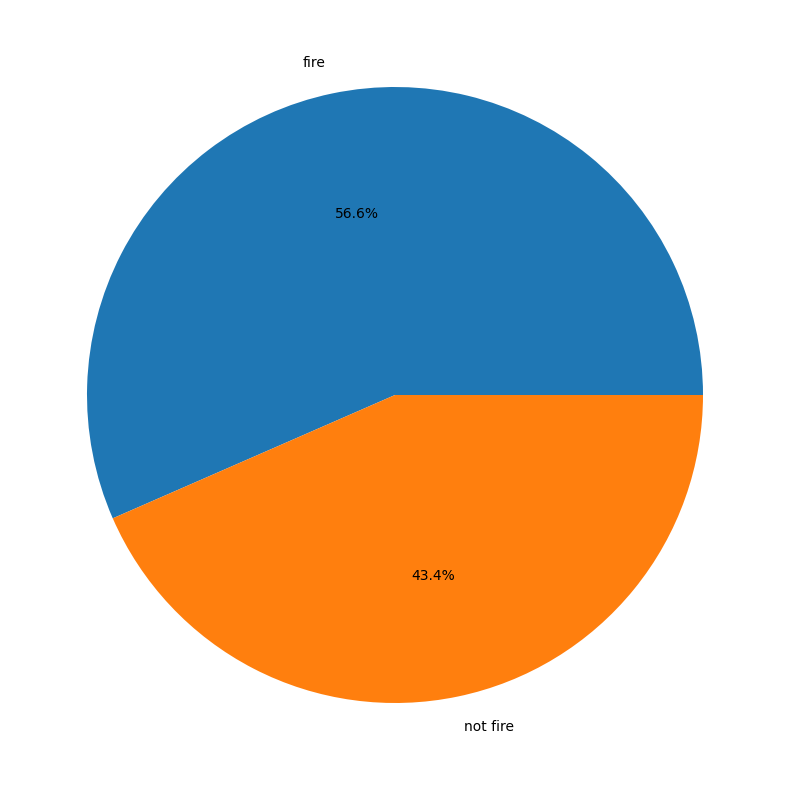

In [49]:
plt.figure(figsize=(10,10))
plt.pie(percantage,labels=labels,autopct='%.1f%%')
plt.show()

In [50]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350753,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.082606,0.022333,-9.586232e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564596,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577572,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032312,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324368,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690287,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875827,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738716,0.507132,-8.148217e-02


In [51]:
df.drop(['day','month','year'],inplace=True,axis=1)

In [52]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564596,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577572,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032312,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324368,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690287,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875827,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738716,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916338,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857630,0.583882,0.087370
FWI,0.564596,-0.577572,0.032312,-0.324368,0.690287,0.875827,0.738716,0.916338,0.857630,1.000000,0.718076,0.196693


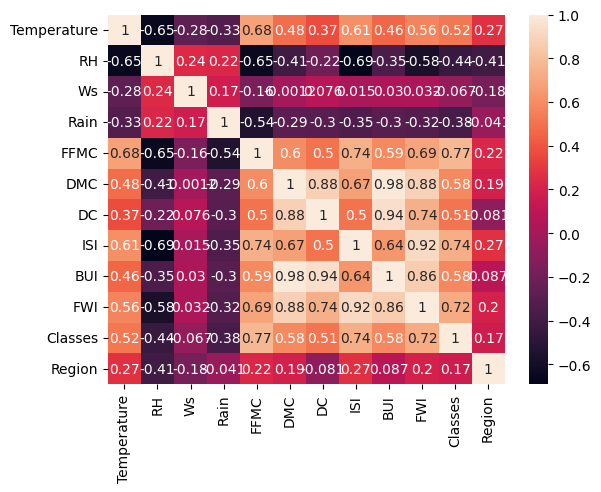

In [53]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: ylabel='FWI'>

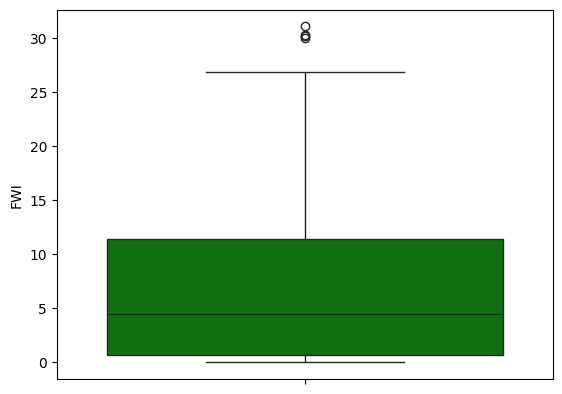

In [54]:
sns.boxplot(df['FWI'],color='green')

In [55]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


<Axes: xlabel='month', ylabel='count'>

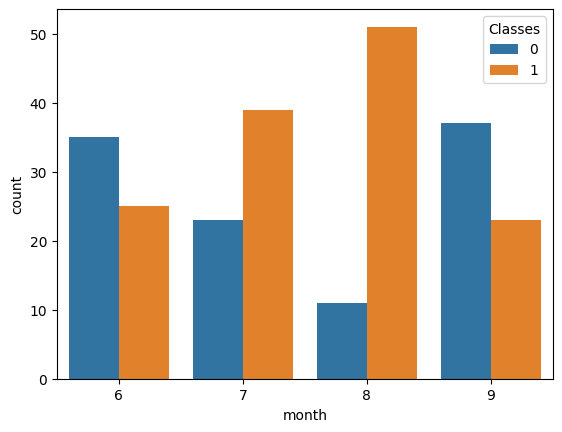

In [56]:
sns.countplot(x='month',hue='Classes',data=df_cp)

In [57]:
df=pd.read_csv('./datasets/algerian_cleaned_data.csv')

In [58]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [59]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [60]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [61]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [62]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [65]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374689,0.609525,0.458575,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215094,-0.694976,-0.344365,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073933,0.015384,0.022529,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296119,-0.353219,-0.301347,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508360,0.744270,0.592841,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877050,0.652894,0.981876,0.580530,0.197489
DC,0.374689,-0.215094,0.073933,-0.296119,0.508360,0.877050,1.000000,0.496586,0.941251,0.501292,-0.079207
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496586,1.000000,0.624038,0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941251,0.624038,1.000000,0.583094,0.092548
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501292,0.744568,0.583094,1.000000,0.158763


In [66]:
def correlation(X_train,threshold):
    col_corr=set()
    corr_matrix=X_train.corr()
    for i in range(len(X_train.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                col_name=X_train.columns[i]
                col_corr.add(col_name)
                print(corr_matrix.iloc[i,j],col_name)
    return col_corr

In [67]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374689,0.609525,0.458575,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215094,-0.694976,-0.344365,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073933,0.015384,0.022529,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296119,-0.353219,-0.301347,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508360,0.744270,0.592841,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877050,0.652894,0.981876,0.580530,0.197489
DC,0.374689,-0.215094,0.073933,-0.296119,0.508360,0.877050,1.000000,0.496586,0.941251,0.501292,-0.079207
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496586,1.000000,0.624038,0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941251,0.624038,1.000000,0.583094,0.092548
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501292,0.744568,0.583094,1.000000,0.158763


In [68]:
#it will returns the columns that are multicollinear
columns_to_drop=correlation(X_train,0.85)

0.8770502658647201 DC
0.9818763785379938 BUI
0.9412505272937534 BUI


In [69]:
columns_to_drop

{'BUI', 'DC'}

In [70]:
X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
 115           29  65  19   0.6  68.3   5.5  15.2  1.5   5.8        0     0.0
 181           36  56  16   0.0  88.9  23.8  57.1  8.2  23.8        1     1.0
 225           31  72  14   0.0  84.2   8.3  25.2  3.8   9.1        1     1.0
 68            32  60  18   0.3  77.1  11.3  47.0  2.2  14.1        0     0.0
 104           25  86  21   4.6  40.9   1.3   7.5  0.1   1.8        0     0.0
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   7.3  0.2   1.4        0     0.0
 14            28  80  17   3.1  49.4   3.0   7.4  0.4   3.0        0     0.0
 92            25  76  17   7.2  46.0   1.3   7.5  0.2   1.8        0     0.0
 179           33  57  16   0.0  87.5  15.7  37.6  6.7  15.7        1     1.0
 102           30  77  21   1.8  58.5   1.9   8.4  1.1   2.4        0     0.0
 
 [183 rows x 11 columns],
      Temperature  RH  Ws  Rain  FFM

In [77]:
X_train=X_train.drop(columns_to_drop,axis=1)

In [71]:
X_test=X_test.drop(columns_to_drop,axis=1)

In [78]:
X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
 115           29  65  19   0.6  68.3   5.5  1.5        0     0.0
 181           36  56  16   0.0  88.9  23.8  8.2        1     1.0
 225           31  72  14   0.0  84.2   8.3  3.8        1     1.0
 68            32  60  18   0.3  77.1  11.3  2.2        0     0.0
 104           25  86  21   4.6  40.9   1.3  0.1        0     0.0
 ..           ...  ..  ..   ...   ...   ...  ...      ...     ...
 106           24  82  15   0.4  44.9   0.9  0.2        0     0.0
 14            28  80  17   3.1  49.4   3.0  0.4        0     0.0
 92            25  76  17   7.2  46.0   1.3  0.2        0     0.0
 179           33  57  16   0.0  87.5  15.7  6.7        1     1.0
 102           30  77  21   1.8  58.5   1.9  1.1        0     0.0
 
 [183 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 24            31  64  15   0.0  86.7  14.2   5.7        1     0.0
 6             33  54  13   0.0  88.2   9.9   6

# feature scaling or standarization

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()

In [79]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [80]:
X_train_scaled,X_test_scaled

(array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.773495  ,
         -1.1098231 , -1.00547949],
        [ 1.06405791, -0.44884168,  0.15167049, ...,  0.83939993,
          0.9010445 ,  0.99455037],
        [-0.27516216,  0.63907922, -0.60875963, ..., -0.21981465,
          0.9010445 ,  0.99455037],
        ...,
        [-1.88222624,  0.91105944,  0.53188555, ..., -1.08644476,
         -1.1098231 , -1.00547949],
        [ 0.26052587, -0.38084663,  0.15167049, ...,  0.47830405,
          0.9010445 ,  0.99455037],
        [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.86978723,
         -1.1098231 , -1.00547949]]),
 array([[-2.75162156e-01,  9.51187672e-02, -2.28544571e-01,
         -3.81132246e-01,  6.38241722e-01, -4.01362602e-02,
          2.37573464e-01,  9.01044498e-01, -1.00547949e+00],
        [ 2.60525871e-01, -5.84831795e-01, -9.88974688e-01,
         -3.81132246e-01,  7.42136256e-01, -3.84555270e-01,
          4.06084874e-01,  9.01044498e-01, -1.00547949e+00],
        [ 2

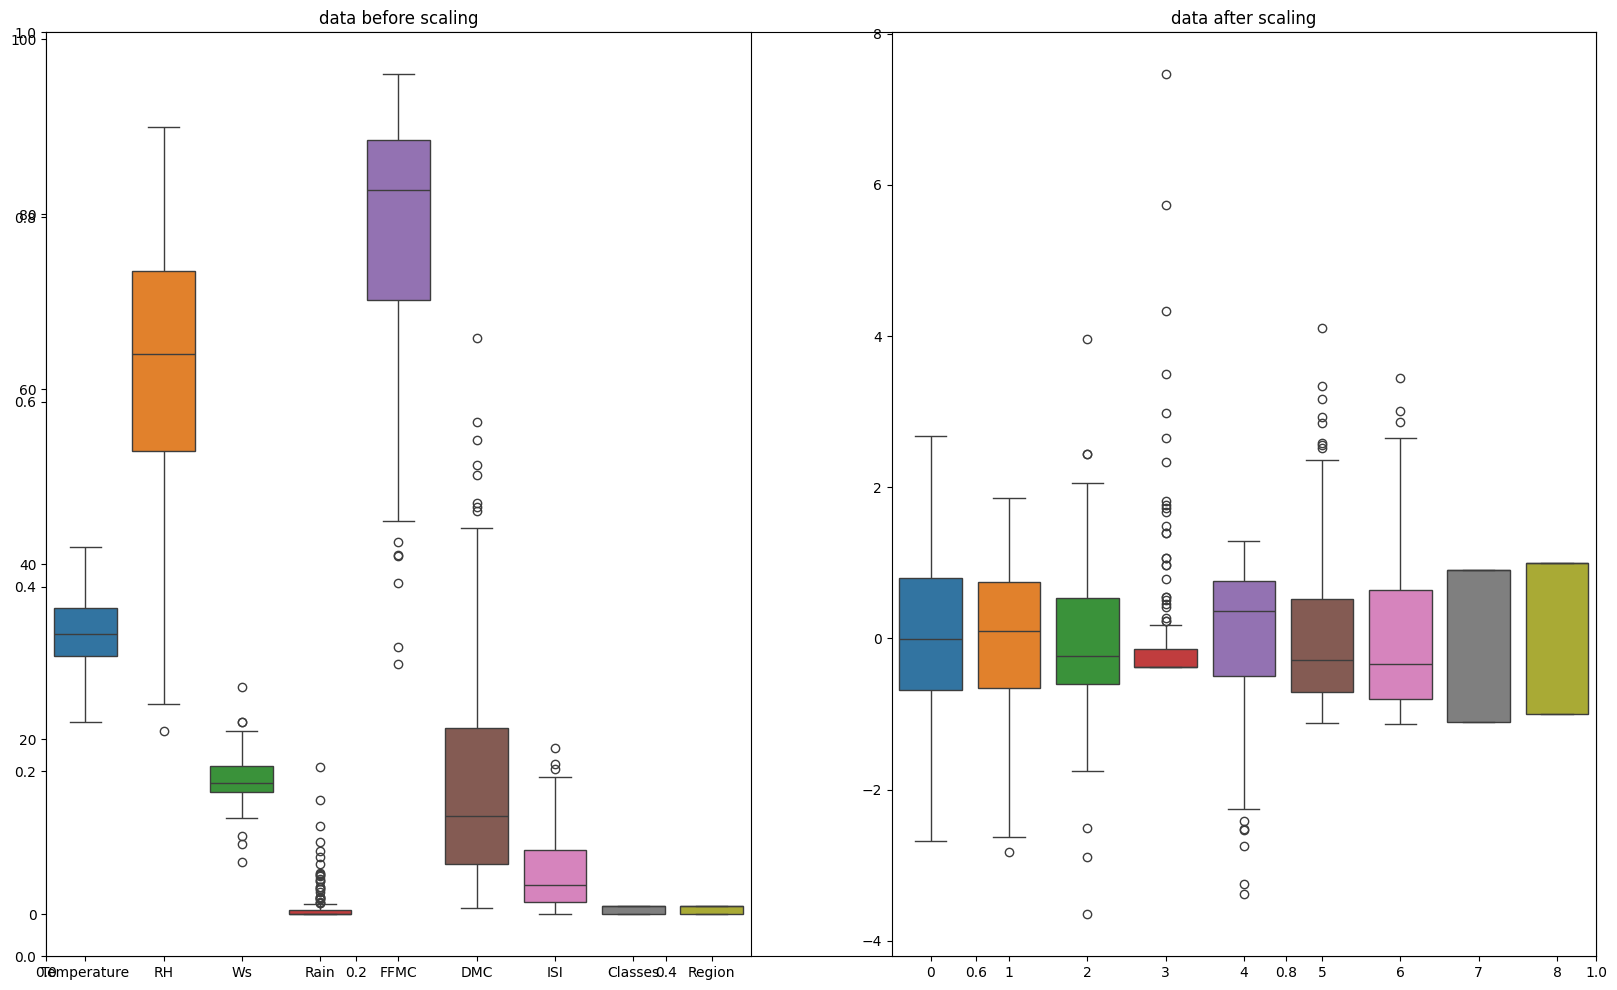

In [81]:
plt.subplots(figsize=(20,12))
plt.subplot(1,2,1)
plt.title('data before scaling')
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title('data after scaling')
sns.boxplot(data=X_train_scaled)
plt.show()

# Effect of scaling on the data using z score in this we replace the data point with its z score , 
# In this first we calculate the mean and the variance,datapoint minus mean divides by its variance

# Linear regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [83]:
regressor=LinearRegression()

In [84]:
#training of the model on the scaled data and the output data
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [85]:
#predictions for the scaled data
y_pred=regressor.predict(X_test_scaled)

In [86]:
mean_absolute_error(y_test,y_pred)

0.6076120952991867

In [87]:
accuracy=r2_score(y_test,y_pred)

In [88]:
accuracy

0.9888510864010674

# lasso Regression

In [89]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train_scaled,y_train)
lasso_pred=lasso_reg.predict(X_test_scaled)
lasso_mae=mean_absolute_error(y_test,lasso_pred)
lasso_acc=r2_score(y_test,lasso_pred)

In [90]:
print('Accuracy of lasso is : ', lasso_acc)
print('mae of lasso regression is  : ', lasso_mae)

Accuracy of lasso is :  0.9498758491729482
mae of lasso regression is  :  1.2228005226202903


# Ridge Regression

In [91]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
ridge_pred=ridge.predict(X_test_scaled)
ridge_mae=mean_absolute_error(y_test,ridge_pred)
ridge_accuracy=r2_score(y_test,ridge_pred)

In [92]:
print('Accuracy of ridge regression is : ', ridge_accuracy)
print('mae of lasso ridge regression is  : ', ridge_mae)

Accuracy of ridge regression is :  0.9881577653970456
mae of lasso ridge regression is  :  0.6310313461172448


# Elastic Regression

In [93]:
from sklearn.linear_model import ElasticNet
elas_reg=ElasticNet()
elas_reg.fit(X_train_scaled,y_train)

ElasticNet()

In [94]:
elas_pred=elas_reg.predict(X_test_scaled)

In [95]:
elas_mae=mean_absolute_error(y_test,elas_pred)

In [96]:
elas_acc=r2_score(y_test,elas_pred)

In [97]:
print('Accuracy of Elastic regression is : ', elas_acc)
print('mae of Elastic ridge regression is  : ', elas_mae)

Accuracy of Elastic regression is :  0.8748805446789789
mae of Elastic ridge regression is  :  1.919795730143287


In [98]:
import pickle

In [101]:
pickle.dump(ridge,open('algerian_ridge_model.pkl','wb'))
pickle.dump(scaler,open('algerian_ridge_scaler.pkl','wb'))

In [100]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [102]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0.0
181,36,56,16,0.0,88.9,23.8,8.2,1,1.0
225,31,72,14,0.0,84.2,8.3,3.8,1,1.0
68,32,60,18,0.3,77.1,11.3,2.2,0,0.0
104,25,86,21,4.6,40.9,1.3,0.1,0,0.0


In [113]:
test=X_train.loc[115]

In [115]:
y_train.loc[115]

0.7

In [116]:
scaled_data=scaler.transform([test])

C:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [117]:
ridge.predict(scaled_data)

array([1.192793])